# Imports padrão

In [ ]:
import pandas as pd
import numpy as np

# Load date files from kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"neithan","key":"cb491d19f3c8c1af5b08047593ff7851"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# mudando permissão
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

bitcoin-historical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "bitcoin-historical-data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [ ]:
df = pd.read_csv("coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [ ]:
# date missing
df.isnull()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
2099755,False,False,False,False,False,False,False,False
2099756,False,False,False,False,False,False,False,False
2099757,False,False,False,False,False,False,False,False
2099758,False,False,False,False,False,False,False,False


In [ ]:
df = df.dropna()

In [ ]:
df.sample() 

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1093269,1486509360,1053.49,1053.5,1053.49,1053.5,1.5802,1664.726808,1053.491209


# Vizualize date

In [ ]:
import matplotlib.pyplot as plt

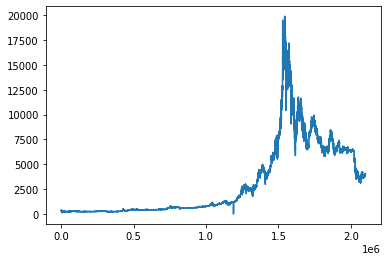

In [ ]:
plt.plot(df['Close'])
plt.show()

# Training

In [ ]:
# X = df.drop(['Timestamp', 'Weighted_Price', "Close"], axis=1)
y = df['Close'].copy()
X = df['Timestamp'].values.reshape(-1, 1)
# y = df['Close'].copy().values.reshape(-1,1)

print("{}  {} ".format(X.shape, y.shape))

(1990691, 1)  (1990691,) 


In [ ]:
regressor = DecisionTreeRegressor(max_depth=7) # melhor profundidade => 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=None)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print("{}  {} ".format(X_test.shape, y_test.shape))

(796277, 1)  (796277,) 


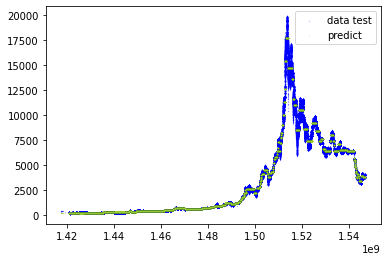

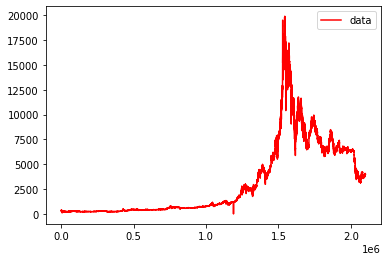

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure()
plt.scatter( X_test, y_test, s=0.01, c="blue", label="data test")
plt.scatter( X_test, y_pred, s=0.01, color="yellowgreen",  label="predict")
plt.legend()
plt.show()

plt.figure()
plt.plot(y, color="red", label="data")
plt.legend()
plt.show()

# Performace

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

for i in range(1,11): # verificando o melhor parametro max_depth
  regressor = DecisionTreeRegressor(max_depth=i)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  test_score = cross_val_score(regressor, X_test, y_test)
  print("Max depth: ", i)
  print("Score: ", test_score)
  print("Accuracy: %0.2f (+/- %0.2f)" % (test_score.mean(), test_score.std() * 2))

Max depth:  1
Score:  [0.73641853 0.73476802 0.73691669 0.73387064 0.73434786]
Accuracy: 0.74 (+/- 0.00)
Max depth:  2
Score:  [0.85529722 0.85424355 0.85557264 0.8537154  0.85476459]
Accuracy: 0.85 (+/- 0.00)
Max depth:  3
Score:  [0.91145294 0.91056467 0.91090985 0.91021742 0.91193858]
Accuracy: 0.91 (+/- 0.00)
Max depth:  4
Score:  [0.96727038 0.96754156 0.96670101 0.96679664 0.96734285]
Accuracy: 0.97 (+/- 0.00)
Max depth:  5
Score:  [0.98422402 0.98433179 0.98413391 0.98429075 0.98444947]
Accuracy: 0.98 (+/- 0.00)
Max depth:  6
Score:  [0.99114486 0.9910945  0.9910186  0.9911134  0.99128528]
Accuracy: 0.99 (+/- 0.00)
Max depth:  7
Score:  [0.99567385 0.9957237  0.99562706 0.99571495 0.99570377]
Accuracy: 1.00 (+/- 0.00)
Max depth:  8
Score:  [0.99723493 0.99727195 0.99722962 0.99726774 0.99725254]
Accuracy: 1.00 (+/- 0.00)
Max depth:  9
Score:  [0.99836583 0.99835935 0.99835639 0.99835334 0.99835349]
Accuracy: 1.00 (+/- 0.00)
Max depth:  10
Score:  [0.99915301 0.99917341 0.9991733